In [1]:
import json
from urllib.request import urlopen
import pandas as pd
import numpy as np
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import lxml
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import openpyxl

In [2]:
topic_name = input("기술명을 입력해 주세요. : ")
url = "https://github.com/topics/{}?o=desc&s=stars".format(topic_name)
# 내 컴퓨터의 User_Agent
res= requests.get(url)
res.raise_for_status()
soup=BeautifulSoup(res.text,"lxml")
soup
options = webdriver.ChromeOptions()
# headless option임

# options.add_argument("headless")
browser = webdriver.Chrome("./chromedriver",options=options)
# browser = webdriver.Chrome("./chromedriver")
browser.get(url)
soup = BeautifulSoup(browser.page_source,'lxml')
# Load more 을 몇번 누를것인지??
# 임의로 100번을 했지만 star수가 예를들어 x개 이상일때까지 Load_more버튼을 누르는 식으로도 가능
Load_more_times = 120
for _ in range(Load_more_times):
    print('클릭 횟수 :', _+1)
    prev = len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"}))
    try:
        browser.find_element_by_xpath("/html/body/div[4]/main/div[2]/div[2]/div/div[1]/form/button").click()
    except:
        print("End")
        break
    while 1:
        soup = BeautifulSoup(browser.page_source,'lxml')
        if prev < len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"})):
            prev = len(soup.find_all("article",attrs={"class":"border rounded color-shadow-small color-bg-subtle my-4"}))
            break
    print(prev,"개 load 완료.")
    
# Topic들을 Crawling후 나열 
soup = BeautifulSoup(browser.page_source,'lxml')
topics = soup.find_all("h3",attrs={"class":"f3 color-fg-muted text-normal lh-condensed"})
topic_ads = []
for i in topics:
    topic_ad = "".join(i.get_text().strip().replace("\n","").split()) 
    topic_ads.append(topic_ad)

    


기술명을 입력해 주세요. : google-colab


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50024/3645515258.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome("./chromedriver",options=options)


클릭 횟수 : 1


/var/folders/77/bz3g3h4j4hbbknntq2tmr9h80000gn/T/ipykernel_50024/3645515258.py:23: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath("/html/body/div[4]/main/div[2]/div[2]/div/div[1]/form/button").click()


40 개 load 완료.
클릭 횟수 : 2
60 개 load 완료.
클릭 횟수 : 3
80 개 load 완료.
클릭 횟수 : 4
100 개 load 완료.
클릭 횟수 : 5
120 개 load 완료.
클릭 횟수 : 6
140 개 load 완료.
클릭 횟수 : 7
160 개 load 완료.
클릭 횟수 : 8
180 개 load 완료.
클릭 횟수 : 9
200 개 load 완료.
클릭 횟수 : 10
220 개 load 완료.
클릭 횟수 : 11
240 개 load 완료.
클릭 횟수 : 12
260 개 load 완료.
클릭 횟수 : 13
280 개 load 완료.
클릭 횟수 : 14
300 개 load 완료.
클릭 횟수 : 15
320 개 load 완료.
클릭 횟수 : 16
340 개 load 완료.
클릭 횟수 : 17
360 개 load 완료.
클릭 횟수 : 18
380 개 load 완료.
클릭 횟수 : 19
400 개 load 완료.
클릭 횟수 : 20
420 개 load 완료.
클릭 횟수 : 21
440 개 load 완료.
클릭 횟수 : 22
460 개 load 완료.
클릭 횟수 : 23
480 개 load 완료.
클릭 횟수 : 24
500 개 load 완료.
클릭 횟수 : 25
520 개 load 완료.
클릭 횟수 : 26
540 개 load 완료.
클릭 횟수 : 27
560 개 load 완료.
클릭 횟수 : 28
580 개 load 완료.
클릭 횟수 : 29
600 개 load 완료.
클릭 횟수 : 30
620 개 load 완료.
클릭 횟수 : 31
640 개 load 완료.
클릭 횟수 : 32
660 개 load 완료.
클릭 횟수 : 33
680 개 load 완료.
클릭 횟수 : 34
700 개 load 완료.
클릭 횟수 : 35
720 개 load 완료.
클릭 횟수 : 36
740 개 load 완료.
클릭 횟수 : 37
760 개 load 완료.
클릭 횟수 : 38
780 개 load 완료.
클릭 횟수 : 39
795 개 load 완료.
클릭 횟수 : 

In [3]:
soup = BeautifulSoup(browser.page_source,'lxml')
topics = soup.find_all("h3",attrs={"class":"f3 color-fg-muted text-normal lh-condensed"})
stars = soup.find_all('span','Counter js-social-count')

topic_ads = []
stars_ads = []
for i in topics:
    topic_ad = "".join(i.get_text().strip().replace("\n","").split()) 
    topic_ads.append(topic_ad)
for i in stars:
    star = i.text
    if 'k' in star:
        star = float(star.split('k')[0]) * 1000
    else:
        star = float(star)
    
    stars_ads.append(star)

In [4]:
# topics 이 들어갈 dic
topics_dic = {}
topics_list= []

def Crawling(ad):
    global topics_dic
    global topics_list  
    url_topic = "https://github.com/" + ad
    res_topic = requests.get(url_topic)

    soup_topic = BeautifulSoup(res_topic.text,"lxml")
    try:
        topic = soup_topic.find("div",attrs={"class":"BorderGrid-cell"}).find_all("a",attrs={"class":"topic-tag topic-tag-link"})
    except:
        time.sleep(1)
        Crawling(ad)
        return
    project_topics=[i.get_text().replace("\n","").replace("\t","").strip() for i in topic]
    topics_list.append([topic_ads[idx],project_topics])
    for t in project_topics:
        if t in topics_dic:
            topics_dic[t] += 1
        else:
            topics_dic[t] = 1

# 한번의 loop마다 주소생성,soup생성,Crawling을 하기때문에 코드 실행시간이 매우 오래걸림
for idx,ad in enumerate(topic_ads):
    print("{}% 완료".format(round(((idx+1)*100/len(topic_ads)),2)))
    Crawling(ad)


topics_dic= sorted(topics_dic.items(), key=lambda x: x[1], reverse=True)

df_keyword = pd.DataFrame(topics_list,columns=['project_name','topic_keyword'])
df_keyword.to_excel("keyword({}).xlsx".format(topic_name))
print("keyword({}).xlsx".format(topic_name),"저장완료.")

0.13% 완료
0.25% 완료
0.38% 완료
0.5% 완료
0.63% 완료
0.75% 완료
0.88% 완료
1.01% 완료
1.13% 완료
1.26% 완료
1.38% 완료
1.51% 완료
1.64% 완료
1.76% 완료
1.89% 완료
2.01% 완료
2.14% 완료
2.26% 완료
2.39% 완료
2.52% 완료
2.64% 완료
2.77% 완료
2.89% 완료
3.02% 완료
3.14% 완료
3.27% 완료
3.4% 완료
3.52% 완료
3.65% 완료
3.77% 완료
3.9% 완료
4.03% 완료
4.15% 완료
4.28% 완료
4.4% 완료
4.53% 완료
4.65% 완료
4.78% 완료
4.91% 완료
5.03% 완료
5.16% 완료
5.28% 완료
5.41% 완료
5.53% 완료
5.66% 완료
5.79% 완료
5.91% 완료
6.04% 완료
6.16% 완료
6.29% 완료
6.42% 완료
6.54% 완료
6.67% 완료
6.79% 완료
6.92% 완료
7.04% 완료
7.17% 완료
7.3% 완료
7.42% 완료
7.55% 완료
7.67% 완료
7.8% 완료
7.92% 완료
8.05% 완료
8.18% 완료
8.3% 완료
8.43% 완료
8.55% 완료
8.68% 완료
8.81% 완료
8.93% 완료
9.06% 완료
9.18% 완료
9.31% 완료
9.43% 완료
9.56% 완료
9.69% 완료
9.81% 완료
9.94% 완료
10.06% 완료
10.19% 완료
10.31% 완료
10.44% 완료
10.57% 완료
10.69% 완료
10.82% 완료
10.94% 완료
11.07% 완료
11.19% 완료
11.32% 완료
11.45% 완료
11.57% 완료
11.7% 완료
11.82% 완료
11.95% 완료
12.08% 완료
12.2% 완료
12.33% 완료
12.45% 완료
12.58% 완료
12.7% 완료
12.83% 완료
12.96% 완료
13.08% 완료
13.21% 완료
13.33% 완료
13.46% 완료
13.58% 완료
13.71% 완료

In [5]:
df_keyword.head(20)

,project_name,topic_keyword
0,tugstugi/dl-colab-notebooks,"[deep-neural-networks, deep-learning, tensorfl..."
1,firmai/machine-learning-asset-management,"[machine-learning, jupyter-notebook, quant, po..."
2,firmai/awesome-google-colab,"[python, data-science, machine-learning, tutor..."
3,towardsai/tutorials,"[python, nlp, data-science, machine-learning, ..."
4,yoshitomo-matsubara/torchdistill,"[nlp, natural-language-processing, glue, pytor..."
5,WassimBenzarti/colab-ssh,"[ssh, ssh-server, vscode, ssh-tunnel, google-c..."
6,PradyumnaKrishna/Colab-Hacks,"[colab, rdp, hacktoberfest, colaboratory, goog..."
7,Tanu-N-Prabhu/Python,"[python, data, machine-learning, numpy, pandas..."
8,AntonMu/TrainYourOwnYOLO,"[python, deep-learning, gpu, keras, inference,..."
9,someshkar/colabcat,"[hashcat, password-cracker, password-cracking,..."


### 해당 ipynb 경로에 (토픽 이름).xlsx 파일 형태로 저장

In [6]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

In [7]:
df_keyword = pd.DataFrame(topics_list,columns=['project_name','topic_keyword'])
df_keyword['stars'] = stars_ads
df_keyword.to_excel("keyword({}).xlsx".format(topic_name))
print("keyword({}).xlsx".format(topic_name),"저장완료.")

keyword(google-colab).xlsx 저장완료.


In [8]:
topic_dic = {}
for idx,j in enumerate(df_keyword['topic_keyword']):
    for i in j:
        i = i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
result = []
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)

topic_list = [i[0] for i in topic_dic]
# 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
df_vector = pd.DataFrame(topic_list).transpose()

topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
# 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
df_vector = pd.DataFrame(result,index=df_keyword['project_name'],columns=topic_list).fillna(0)

# 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
for idx,topics in enumerate(df_keyword['topic_keyword']):
    for topic_ in topics:
        if topic_ in topic_list:
            topic_ = same_things(topic_)
            df_vector.loc[df_keyword['project_name'].iloc[idx],topic_] += 1
df_vector.to_excel("keyword({})_vectors.xlsx".format(topic_name),index=False)
print("keyword({})_vectors.xlsx".format(topic_name),"저장완료.\n")


keyword(google-colab)_vectors.xlsx 저장완료.



## K-Means 클러스터링

In [9]:
df_vector

,google-colab,python,machinelearning,google-colaboratory,deep-learning,note,colab-notebook,colab,google-colab-notebook,tensorflow,...,language-r,pneumonia-detection,translator,googletrans,dbeaver,bitcoinapi,palindrome,palindromes,fem,fenics
project_name,,,,,,,,,,,,,,,,,,,,,
tugstugi/dl-colab-notebooks,1,0,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
firmai/machine-learning-asset-management,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
firmai/awesome-google-colab,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
towardsai/tutorials,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yoshitomo-matsubara/torchdistill,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZachDougherty/Predicting-Employee-Attrition,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hackley-STEM-Club/PyTorchTutorial,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DrorNeumeier/MyPalindromeMaker,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


K-means의 Cluster 수 : 10
********** google-colab K-Means 클러스터링 시작 **********


/Users/kyutaekim/opt/anaconda3/envs/crawling/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


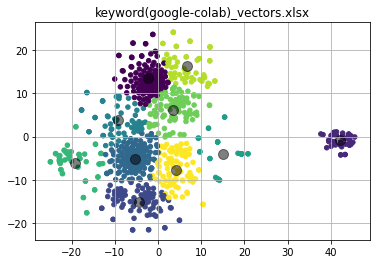

   num                                           clusters  cluster_num  \
0    0  [firmai/awesome-google-colab, Tanu-N-Prabhu/Py...          125   
1    1  [demining/ethereum-wallet-Google-Colab, demini...           59   
2    2  [tugstugi/dl-colab-notebooks, yoshitomo-matsub...           87   
3    3  [firmai/machine-learning-asset-management, Was...          138   
4    4  [gsurma/image_classifier, yfletberliac/rlss-20...           61   
5    5  [woctezuma/stylegan2-projecting-images, bitnom...           30   
6    6  [fpv-iplab/DA-RetinaNet, GiovanniPasq/DA-Faste...           56   
7    7  [towardsai/tutorials, AntonMu/TrainYourOwnYOLO...           89   
8    8  [anujvyas/Machine-Learning-Projects, br3ndonla...           62   
9    9  [PradyumnaKrishna/Colab-Hacks, FKLC/Torrent-To...           88   

                                       top_15_topics  
0  [(python, 132), (google-colab, 125), (note, 40...  
1  [(google-colab, 59), (google-colaboratory, 59)...  
2  [(google-colab, 8

In [10]:
n_clusters = int(input("K-means의 Cluster 수 : "))
print("{} {} K-Means 클러스터링 시작 {}".format("*"*10,topic_name,"*"*10))
excel_name = "keyword({})_vectors.xlsx".format(topic_name)
df_topic = df_keyword
df_vector = pd.read_excel(excel_name)
m = TSNE(learning_rate = 50,random_state=0)
tsne_features = m.fit_transform(pd.DataFrame(df_vector))
df = pd.DataFrame()
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]
    
if len(df) <= n_clusters:
    print("Repository 가 {}개 미만입니다.".format(n_clusters))
    n_clusters = len(df)//3
    print("{}개의 Cluster로 군집화 시작합니다.".format(n_clusters))
else:
    # 10개의 Cluster 지정
    n_clusters = n_clusters
kmeans = KMeans(n_clusters=n_clusters,random_state=0)
# kmeans = KMeans(n_clusters=4,verbose = 1)

# 모델에 fitting 하기
kmeans.fit(tsne_features)

y_kmeans = kmeans.predict(tsne_features)
y_kmeans[0:10] # 군집화 된 결과
    
plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.title(excel_name)
plt.show()
    
    
clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df_topic['project_name'][idx]]
    else:
        clustered_dic[i].append(df_topic['project_name'][idx])
clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num
    
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?
topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
        topics = list(df_topic[df_topic['project_name']==j]['topic_keyword'].values[0])
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i.strip())
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
    topic_clustered_list.append(temp_dic[:15])
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster.to_excel("{}_kmeans_10clusters.xlsx".format(topic_name),index=False)
print(df_cluster)
print("{}_kmeans_10clusters.xlsx".format(topic_name),"저장완료")
print("*"*50)
    


# Choose Top5 repo

In [78]:
df_keyword = pd.read_excel('keyword(cuda).xlsx')

In [31]:
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[heavyai/heavydb, CannyLab/tsne-cuda, DeepGrap...",163,"[(gpu, 163), (cuda, 163), (machinelearning, 17..."
1,1,"[isl-org/Open3D, cupy/cupy, chainer/chainer, O...",128,"[(cuda, 128), (pytorch, 100), (deep-learning, ..."
2,2,"[srush/GPU-Puzzles, chrxh/alien, bytedance/lig...",170,"[(cuda, 170), (cpp, 23), (open-source, 14), (m..."
3,3,"[numba/numba, rapidsai/cudf, mp3guy/ElasticFus...",91,"[(cuda, 91), (python, 54), (tensorflow, 14), (..."
4,4,"[NVIDIA/nvidia-docker, NVlabs/instant-ngp, hyb...",74,"[(cuda, 74), (docker, 46), (open-source, 19), ..."
5,5,"[hashcat/hashcat, arrayfire/arrayfire, diku-dk...",58,"[(cuda, 58), (opencl, 55), (gpgpu, 14), (openm..."
6,6,"[NVIDIA/thrust, NVIDIA/libcudacxx, Xtra-Comput...",62,"[(cuda, 62), (gpu, 44), (cpp, 22), (openmp, 19..."
7,7,"[kaldi-asr/kaldi, uber/aresdb, NVIDIA/cuda-sam...",89,"[(cuda, 89), (cuda-kernels, 14), (rust, 13), (..."
8,8,"[catboost/catboost, rapidsai/cuml, Celtoys/Rem...",96,"[(cuda, 96), (gpu, 87), (nvidia, 52), (opencl,..."
9,9,"[AlexiaJM/Deep-learning-with-cats, shader-slan...",69,"[(cuda, 69), (gpu-computing, 22), (gpgpu, 11),..."


In [53]:
dic = {}
dic['num'] = []
dic['repo'] = []
for i in range(10):
    repo_list = df_cluster.loc[i,'clusters']
    dic['num'].append(i)
    repo_star_list = []
    for repo in repo_list:
        get_star = df_keyword[df_keyword['project_name']== repo]['stars'].iloc[0]

        repo_star_list.append((get_star,repo))
        repo_star_list = sorted(repo_star_list,key=lambda x: -x[0])
    
    dic['repo'].append(repo_star_list[:5])

In [56]:
df_cluster_top5 = pd.DataFrame(dic)
df_cluster['Top5Repo'] = df_cluster_top5['repo']
df_cluster.to_excel("{}_kmeans_10clusters.xlsx".format(topic_name),index=False)

In [80]:
df_keyword = pd.read_excel('keyword(cuda).xlsx')

In [83]:
df_keyword['Org'] = 0
df_keyword['Repo_name'] = 0
for i in range(len(df_keyword)):
    pn = df_keyword.loc[i,'project_name']
    df_keyword.loc[i,'Org'],df_keyword.loc[i,'Repo_name'] = pn.split('/')[0],pn.split('/')[1],

    

In [85]:
df_keyword.drop(['Unnamed: 0','project_name'],axis=1,inplace=True)
df_keyword

,topic_keyword,stars,Org,Repo_name
0,"['c', 'opencl', 'cuda', 'password', 'gpgpu', '...",15500,hashcat,hashcat
1,"['docker', 'gpu', 'cuda', 'nvidia-docker']",15200,NVIDIA,nvidia-docker
2,"['shell', 'c-plus-plus', 'cuda', 'speech', 'sp...",12000,kaldi-asr,kaldi
3,"['machine-learning', 'real-time', 'computer-vi...",9200,NVlabs,instant-ngp
4,"['python', 'compiler', 'numpy', 'llvm', 'paral...",7900,numba,numba
...,...,...,...,...
995,"['computer-vision', 'cuda', 'pytorch', 'python...",7,sagnik1511,CureGraph
996,"['rust', 'gpu', 'proxy', 'cuda', 'webassembly'...",7,yanghaku,faas-watchdog-wasmer-gpu
997,"['linux', 'wheel', 'cuda', 'python3', 'aarch64...",7,Qengineering,TensorFlow-Addons-Jetson-Nano
998,"['hpc', 'gpu', 'cuda', 'load-balancing']",7,gunrock,loops


In [89]:
df_keyword = df_keyword[['Org','Repo_name','topic_keyword','stars']]
df_keyword.to_excel(f'{topic_name}_keyword.xlsx')

## DBSCAN 클러스터링

In [ ]:
print("{} {} DBSCAN 클러스터링 시작 {}".format("*"*10,topic_name,"*"*10))
excel_name = "keyword({})_vectors.xlsx".format(topic_name)
df_vector = pd.read_excel(excel_name)
# eps 값을 조정해나가면서 클러스터링을 해야 더 정확한 결과가 나온다
dbscan = DBSCAN(eps = 0.3)
dbscan_cluster = dbscan.fit_predict(df_vector)
dbscan_cluster
dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))


for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df_topic['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df_topic['project_name'][idx])

# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])

df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
        topics = df_topic[df_topic['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster.to_excel("{}_DBSCAN_clusters.xlsx".format(topic_name),index=False)
print(df_dbscan_cluster)
print("{}_DBSCAN_clusters.xlsx".format(topic_name),"저장완료")
print("*"*50)
